# Data Extraction

In [1]:
from os.path import isfile, isdir
import zipfile

In [2]:
if not isfile('database.csv'):
    with zipfile.ZipFile('earthquake-database.zip', 'r') as the_zip:
        the_zip.extractall()
        the_zip.close()

# Data Exploration

In [3]:
import pandas as pd
import numpy as np
import pprint as pp

In [4]:
# load file
try:
    t_file = pd.read_csv('database.csv', encoding='ISO-8859-1')
    print('File load: Success')
except:
    print('File load: Failed')

File load: Success


In [5]:
t_file.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [6]:
t_file.shape

(23412, 21)

In [7]:
t_file.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [8]:
def print_value_counts():
    for c in t_file.columns:
        print(c)
        print(t_file[c].value_counts())
        print("")
print_value_counts()

Date
03/11/2011    128
12/26/2004     51
02/27/2010     39
02/06/2013     27
11/15/2006     25
03/12/2011     21
11/16/2000     21
02/04/1965     19
07/18/1992     17
12/03/1995     15
08/16/1995     14
12/27/2004     14
07/26/1971     13
10/07/2009     13
09/17/2015     13
03/23/1978     13
10/04/1994     13
03/22/2011     13
10/08/2005     13
04/02/2007     12
03/04/1985     12
07/17/2006     12
04/11/2012     12
04/01/2007     12
09/16/2015     12
08/12/1969     12
04/06/1990     11
10/20/1986     11
06/23/2014     11
06/23/2001     11
             ... 
04/30/1996      1
03/18/1993      1
08/25/1976      1
08/20/2010      1
09/23/1972      1
08/29/1998      1
09/12/1992      1
07/02/1993      1
05/01/2013      1
07/14/2008      1
05/27/1991      1
06/24/2006      1
11/21/1967      1
04/17/1972      1
07/12/1970      1
01/30/2010      1
12/25/1970      1
02/01/1968      1
06/05/1998      1
08/15/1972      1
11/15/1981      1
07/01/1996      1
01/13/1966      1
08/22/1979      1
12/18

# Clean Data

In [38]:
earth = t_file[["Date", "Time" ,"Latitude", "Longitude", "Magnitude", "Depth", "Type"]]
earth["Date"] = pd.to_datetime(earth["Date"])
earth["Year"] = earth["Date"].dt.year
earth["Month"] = earth["Date"].dt.month
earth.head()

G:\Program_Files\Anaconda3\envs\dl-lab\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
G:\Program_Files\Anaconda3\envs\dl-lab\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
G:\Program_Files\Anaconda3\envs\dl-lab\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Date,Time,Latitude,Longitude,Magnitude,Depth,Type,Year,Month
0,1965-01-02,13:44:18,19.246,145.616,6.0,131.6,Earthquake,1965,1
1,1965-01-04,11:29:49,1.863,127.352,5.8,80.0,Earthquake,1965,1
2,1965-01-05,18:05:58,-20.579,-173.972,6.2,20.0,Earthquake,1965,1
3,1965-01-08,18:49:43,-59.076,-23.557,5.8,15.0,Earthquake,1965,1
4,1965-01-09,13:32:50,11.938,126.427,5.8,15.0,Earthquake,1965,1


In [39]:
earth.shape

(23412, 9)

In [40]:
earth.dropna(axis = 0, inplace = True)
earth.shape

G:\Program_Files\Anaconda3\envs\dl-lab\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(23412, 9)

In [41]:
earth.dtypes

Date         datetime64[ns]
Time                 object
Latitude            float64
Longitude           float64
Magnitude           float64
Depth               float64
Type                 object
Year                  int64
Month                 int64
dtype: object

In [42]:
# check if there is nan data
earth.isnull().values.any()

False

In [43]:
earth.drop_duplicates(inplace=True)
earth.shape

G:\Program_Files\Anaconda3\envs\dl-lab\lib\site-packages\pandas\util\decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


(23412, 9)

In [44]:
earth.describe()

,Latitude,Longitude,Magnitude,Depth,Year,Month
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,5.882531,70.767911,1992.632411,6.537887
std,30.113183,125.511959,0.423066,122.651898,14.426100,3.454541
min,-77.080000,-179.997000,5.500000,-1.100000,1965.000000,1.000000
25%,-18.653000,-76.349750,5.600000,14.522500,1981.000000,4.000000
50%,-3.568500,103.982000,5.700000,33.000000,1993.000000,7.000000
75%,26.190750,145.026250,6.000000,54.000000,2005.000000,10.000000
max,86.005000,179.998000,9.100000,700.000000,2016.000000,12.000000


In [45]:
earth.pivot_table(index = "Type", values = "Magnitude", aggfunc = len)

Type
Earthquake           23232.0
Explosion                4.0
Nuclear Explosion      175.0
Rock Burst               1.0
Name: Magnitude, dtype: float64

# Data Visualization

In [46]:
%matplotlib inline

In [47]:
# boxplot and histogram
def plotstats(df, col):
    import matplotlib.pyplot as plt
    ## setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12, 8))
    
    ## fist a box plot
    df.dropna().boxplot(col, ax = ax[0], vert = False, return_type = 'dict')
    
    ## plot the histogram
    temp = df[col].as_matrix()
    ax[1].hist(temp, bins = 30, alpha = 0.7)
    plt.ylabel('Number')
    plt.xlabel(col)
    return [col]

[['Month']]

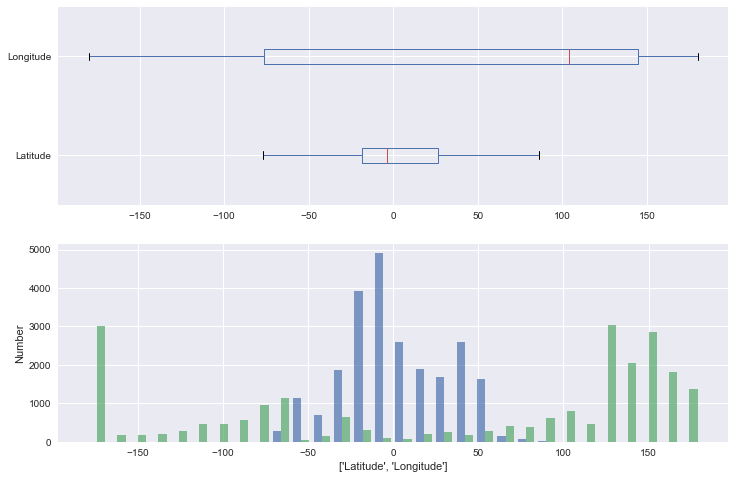

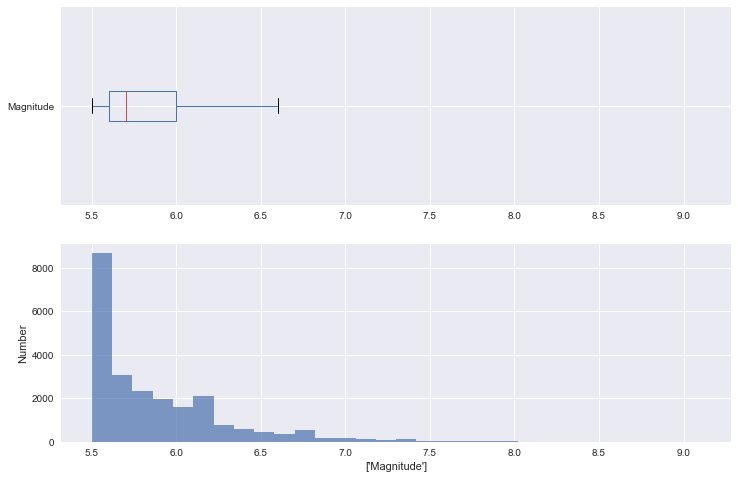

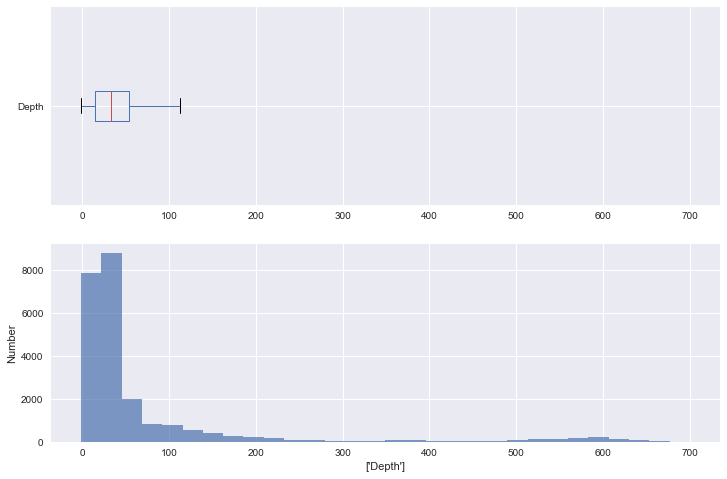

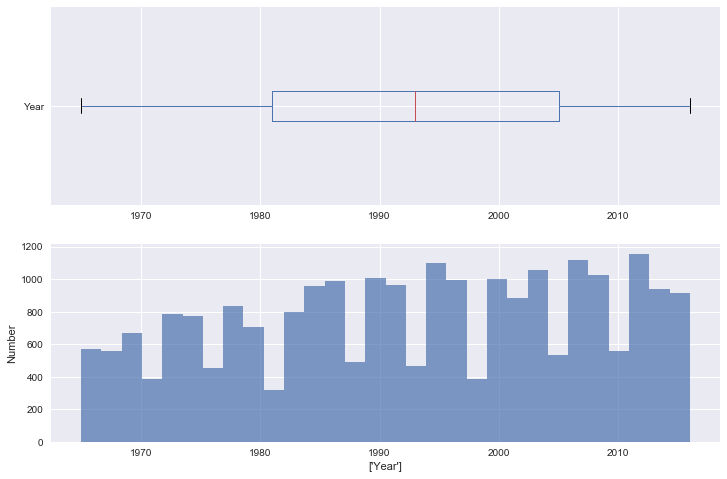

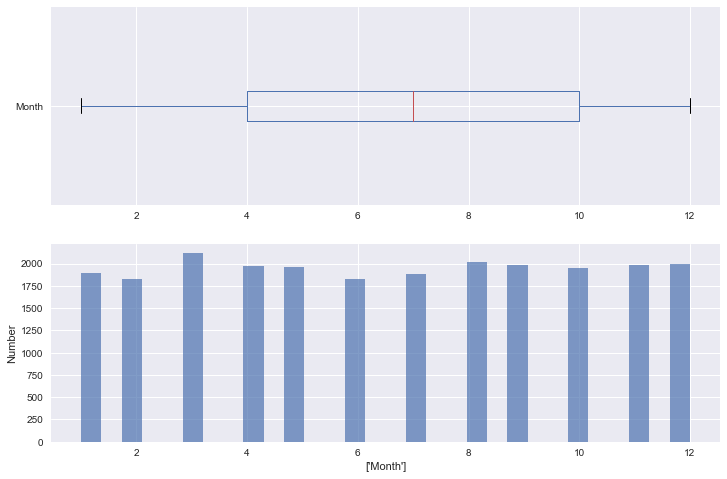

In [48]:
plotstats(earth, ["Latitude", "Longitude"])
plotstats(earth, ["Magnitude"])
plotstats(earth, ["Depth"])
plotstats(earth, ["Year"])
plotstats(earth, ["Month"])

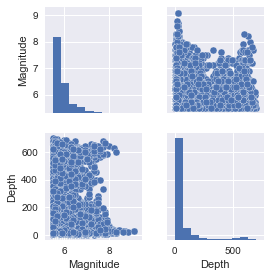

In [49]:
# pair wise scatter plot
import seaborn as sns
num_cols = ["Magnitude", "Depth"]
sns.pairplot(earth[num_cols], size = 2)

In [50]:
# Fucntion to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    # loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=0.7)
    return grid_col

'Type'

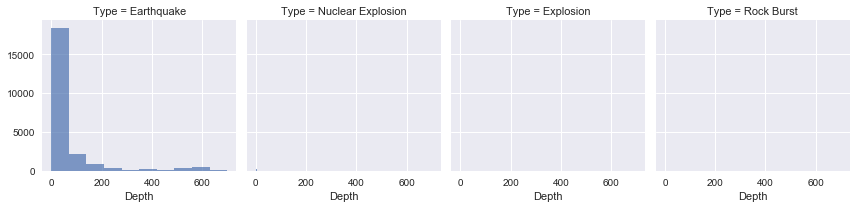

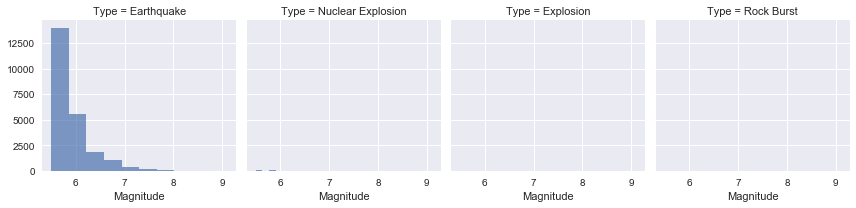

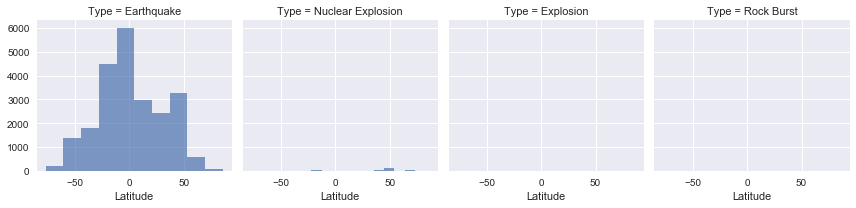

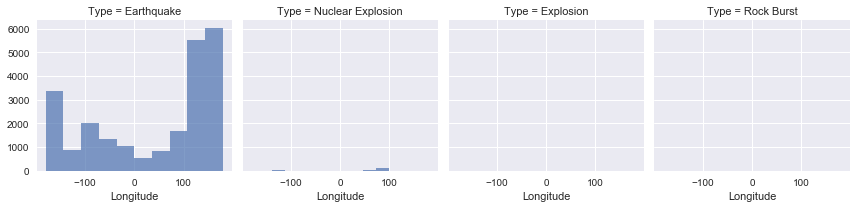

In [51]:
plot_cols = ["Depth", "Magnitude", "Latitude", "Longitude"]
cond_hists(earth, plot_cols, 'Type')

In [52]:
# Create boxplots of data
def auto_boxplot(df, plot_cols, by):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(9,6))
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box plots of ' + col + ' by ' + by)
        ax.set_ylabel(col)
    return by

'Type'

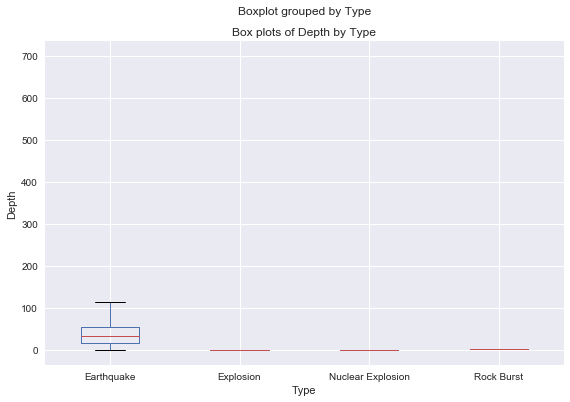

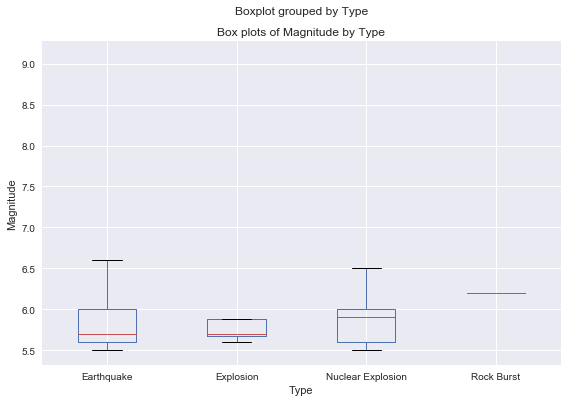

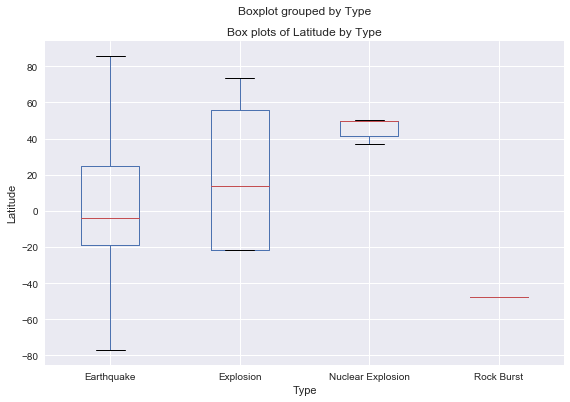

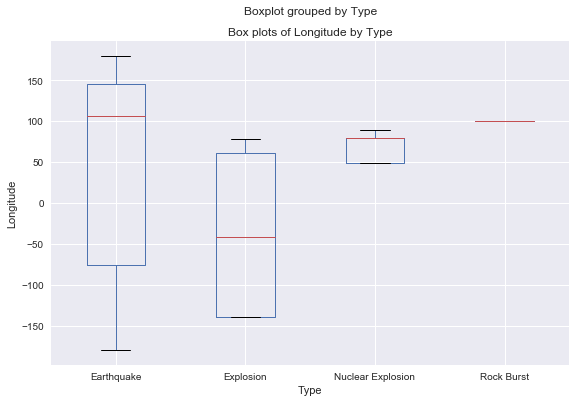

In [53]:
auto_boxplot(earth, plot_cols, 'Type')

Ref: https://www.kaggle.com/futurist/d/usgs/earthquake-database/mapping-of-earthquake-and-its-analysis

In [54]:
# for installation
# conda install basemap
from mpl_toolkits.basemap import Basemap
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

G:\Program_Files\Anaconda3\envs\dl-lab\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
G:\Program_Files\Anaconda3\envs\dl-lab\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


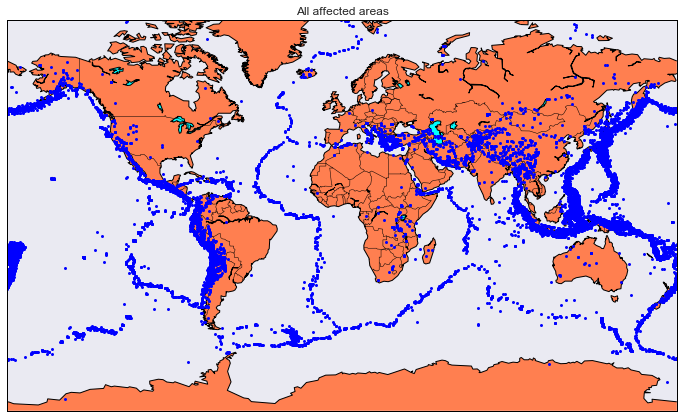

In [55]:
stillm = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
longitudes = earth["Longitude"].tolist()
latitudes = earth["Latitude"].tolist()
x, y = stillm(longitudes, latitudes)

fig = plt.figure(figsize=(12, 10))
plt.title("All affected areas")
stillm.plot(x, y, "o", markersize = 3, color = 'blue')
stillm.drawcoastlines()
stillm.fillcontinents(color='coral', lake_color='aqua')
stillm.drawmapboundary()
stillm.drawcountries()
plt.show()

In [56]:
np.corrcoef(earth["Magnitude"], earth["Depth"])

array([[ 1.        ,  0.02345731],
       [ 0.02345731,  1.        ]])

# Data Preparation

In [70]:
data = earth[["Latitude", "Longitude", "Depth", "Type", "Magnitude"]]

In [71]:
from sklearn.preprocessing import scale
numeric_cols = ["Latitude", "Longitude", "Depth"]
array = data[numeric_cols].as_matrix()
data[numeric_cols] = scale(array, axis=0)
data.head()

,Latitude,Longitude,Depth,Type,Magnitude
0,0.583377,0.844368,0.495984,Earthquake,6.0
1,0.006109,0.698849,0.075272,Earthquake,5.8
2,-0.739162,-1.701962,-0.413928,Earthquake,6.2
3,-2.017599,-0.503524,-0.454694,Earthquake,5.8
4,0.340688,0.691479,-0.454694,Earthquake,5.8


In [72]:
data = pd.get_dummies(data)
data.head()

,Latitude,Longitude,Depth,Magnitude,Type_Earthquake,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst
0,0.583377,0.844368,0.495984,6.0,1,0,0,0
1,0.006109,0.698849,0.075272,5.8,1,0,0,0
2,-0.739162,-1.701962,-0.413928,6.2,1,0,0,0
3,-2.017599,-0.503524,-0.454694,5.8,1,0,0,0
4,0.340688,0.691479,-0.454694,5.8,1,0,0,0


In [75]:
from sklearn.model_selection import train_test_split
y = data[["Magnitude"]]
X = data.drop(["Magnitude"], axis=1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)

In [76]:
X_train.head()

,Latitude,Longitude,Depth,Type_Earthquake,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst
22682,-1.263232,-0.903933,-0.487307,1,0,0,0
12470,-0.812752,1.038728,-0.425342,1,0,0,0
13248,-1.575989,0.449250,-0.495461,1,0,0,0
5164,-0.957343,-0.881903,-0.307934,1,0,0,0
12413,0.344307,0.687440,-0.353593,1,0,0,0


In [77]:
y_test.head()

,Magnitude
17090,5.5
23170,6.3
19222,6.3
3400,5.5
17066,5.8


# Test Parameters

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_grid = {
    'n_estimators' : sp_randint(20, 100),
    'criterion' : ['mse', 'mae'],
    'max_features' : ['auto', 'sqrt', 'log2', .01, .5, .99],
    'max_depth' : sp_randint(1, 5),
    'min_samples_split': sp_uniform(0, 1),
    'min_samples_leaf': sp_randint(300, 2000)
}
model = RandomForestRegressor()
n_iter_search = 20
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=n_iter_search, n_jobs=-1, error_score=0)
random_search.fit(X, y)

RandomizedSearchCV(cv=None, error_score=0,
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B200E039B0>, 'max_features': ['auto', 'sqrt', 'log2', 0.01, 0.5, 0.99], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B200E099E8>, 'criterion': ['mse', 'mae'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B200E09198>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B200E09470>},
          pre_dispatch='2*n_

In [93]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [95]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.016 (std: 0.016)
Parameters: {'min_samples_leaf': 1434, 'max_features': 'auto', 'min_samples_split': 0.040564178342569757, 'criterion': 'mse', 'max_depth': 4, 'n_estimators': 58}

Model with rank: 2
Mean validation score: 0.002 (std: 0.003)
Parameters: {'min_samples_leaf': 1609, 'max_features': 'log2', 'n_estimators': 70, 'criterion': 'mse', 'max_depth': 4, 'min_samples_split': 0.39677237061518789}

Model with rank: 3
Mean validation score: 0.001 (std: 0.001)
Parameters: {'min_samples_leaf': 1157, 'max_features': 0.01, 'n_estimators': 49, 'criterion': 'mse', 'max_depth': 4, 'min_samples_split': 0.3865641137190966}



# Training

In [96]:
train_model = RandomForestRegressor(n_estimators=58, max_depth=4, criterion='mse', min_samples_split=0.040564178342569757, max_features='auto', min_samples_leaf=1434)
train_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1434,
           min_samples_split=0.04056417834256976,
           min_weight_fraction_leaf=0.0, n_estimators=58, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [102]:
y_pred = train_model.transform(X_train)

G:\Program_Files\Anaconda3\envs\dl-lab\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [106]:
y_pred

array([[-0.48730748],
       [-0.42534218],
       [-0.49546081],
       ..., 
       [-0.33239422],
       [ 0.1502829 ],
       [-0.49546081]])

In [103]:
train_model.score(y_pred, y_train)

ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 1 

In [99]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(train_model, X_train, y_train, verbose=3, cv=4, n_jobs=4)
scores

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.3s finished


array([ 0.03004139,  0.02119519,  0.02220726,  0.02492608])

In [100]:
test_scores = cross_val_score(train_model, X_test, y_test, verbose=3, cv=4, n_jobs=4)
test_scores

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.4s finished


array([ -2.14744510e-03,  -4.36132419e-03,  -7.60243202e-06,
        -1.66282076e-04])